In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [34]:
data = [
  [1, 12],
  [2, 14],
  [5, 20],
  [13, 36],
  [17, 44],
  [19, 48],  
  [30, 70],
  [37, 84],
  [43, 96],
  [50, 110]  
]

x = [row[0] for row in data]
print(x)

yr = [row[1] for row in data]
print(yr)

[1, 2, 5, 13, 17, 19, 30, 37, 43, 50]
[12, 14, 20, 36, 44, 48, 70, 84, 96, 110]


In [35]:
session = tf.Session() # session을 새로 생성해야 기존 학습이 초기화됨.
# a = tf.Variable(1, name='atest') # ERROR, 실수를 초기값으로 선언해야함.
# a = tf.Variable(1.0, name='atest') # type이 float32로 인식되어 정확도가 떨어짐
# b = tf.Variable(1.0, name='btest')

# a = tf.Variable(1.0, dtype=tf.float32, name='a')
# b = tf.Variable(1.0, dtype=tf.float32, name='b')

a = tf.Variable(1.0, dtype=tf.float64, name='a')
b = tf.Variable(1.0, dtype=tf.float64, name='b')

y = a * x + b # 예측값
learning_rate = 0.001
 # 평균 제곱근 오차, 예측값 - 실제값
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - yr)))
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

session.run(tf.global_variables_initializer())

# for step in range(301): # 0 ~ 300
# for step in range(2001): # 0 ~ 2000
# for step in range(20001): # 0 ~ 20000
for step in range(30001): # 0 ~ 30000
    session.run(gradient_decent) # 최소의 오차를 찾기위한 경사하강 실행, 학습
    if step % 2000 == 0:
        v_rmse = session.run(rmse) # 평균 제곱근 오차
        v_a = session.run(a)       # 기울기
        v_b = session.run(b)       # y 절편
        # print(v_a)
        fmt = "Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f"
        print(fmt % (step, v_rmse, v_a, v_b))
        
# RMSE가 감소되는 확인 할것 
print('01) 최적의 산출 공식: y = %.4fx + %.4f' % (v_a, v_b))  # y = 8.1x + 80

Epoch: 0, RMSE = 34.1752, 기울기 a = 1.0270, y 절편 b = 1.0009
Epoch: 2000, RMSE = 4.7202, 기울기 a = 2.2258, y 절편 b = 2.2334
Epoch: 4000, RMSE = 3.9821, 기울기 a = 2.1905, y 절편 b = 3.4479
Epoch: 6000, RMSE = 3.2440, 기울기 a = 2.1552, y 절편 b = 4.6624
Epoch: 8000, RMSE = 2.5058, 기울기 a = 2.1199, y 절편 b = 5.8769
Epoch: 10000, RMSE = 1.7677, 기울기 a = 2.0846, y 절편 b = 7.0914
Epoch: 12000, RMSE = 1.0296, 기울기 a = 2.0493, y 절편 b = 8.3059
Epoch: 14000, RMSE = 0.3734, 기울기 a = 2.0225, y 절편 b = 9.5148
Epoch: 16000, RMSE = 0.3737, 기울기 a = 2.0155, y 절편 b = 9.9331
Epoch: 18000, RMSE = 0.3737, 기울기 a = 2.0139, y 절편 b = 9.9911
Epoch: 20000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 9.9991
Epoch: 22000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0002
Epoch: 24000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 26000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 28000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
Epoch: 30000, RMSE = 0.3737, 기울기 a = 2.0137, y 절편 b = 10.0004
01) 최적의 산출 공식: y = 2.0137x

In [36]:
# 최적의 산출 공식: y = 2.0137x + 10.0004
predict = []
for i in range(len(x)):
    y = v_a * x[i] + v_b # 2.0044 * 1 + 10.2715 첫번째 데이터의 경우
    predict.append(y) 
    # print('데이터: %d, 실제값: %d, 예상값: %s'  % (x[i], yr[i], predict[i]))
    print('데이터: %d, 실제값: %d, 예상값: %s'  % (x[i], yr[i], predict[i]))
    print('데이터: %d, 실제값: %d, 예상값: %d'  % (x[i], yr[i], predict[i]))

데이터: 1, 실제값: 12, 예상값: 12.014060096464208
데이터: 1, 실제값: 12, 예상값: 12
데이터: 2, 실제값: 14, 예상값: 14.027723002166752
데이터: 2, 실제값: 14, 예상값: 14
데이터: 5, 실제값: 20, 예상값: 20.06871171927439
데이터: 5, 실제값: 20, 예상값: 20
데이터: 13, 실제값: 36, 예상값: 36.17801496489475
데이터: 13, 실제값: 36, 예상값: 36
데이터: 17, 실제값: 44, 예상값: 44.232666587704934
데이터: 17, 실제값: 44, 예상값: 44
데이터: 19, 실제값: 48, 예상값: 48.259992399110025
데이터: 19, 실제값: 48, 예상값: 48
데이터: 30, 실제값: 70, 예상값: 70.41028436183802
데이터: 30, 실제값: 70, 예상값: 70
데이터: 37, 실제값: 84, 예상값: 84.50592470175584
데이터: 37, 실제값: 84, 예상값: 84
데이터: 43, 실제값: 96, 예상값: 96.58790213597112
데이터: 43, 실제값: 96, 예상값: 96
데이터: 50, 실제값: 110, 예상값: 110.68354247588893
데이터: 50, 실제값: 110, 예상값: 110


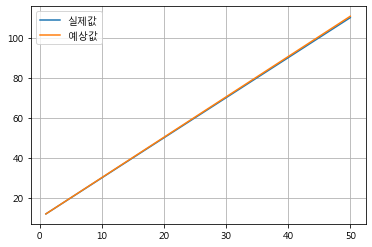

In [37]:
plt.plot(x, yr, label='실제값')
plt.plot(x, predict, label='예상값')
plt.legend()
plt.grid(True)
plt.show()

# 추세선이 성적의 흐름과 비슷함.

In [38]:
# 테스트, 검증
test_x=[23, 37, 43]
test_y=[56, 84, 96]
for i in range(len(test_x)):
    y = v_a * test_x[i] + v_b  
    print('데이터: %d 실제: %d 예측 %d' % (test_x[i], test_y[i], y))


데이터: 23 실제: 56 예측 56
데이터: 37 실제: 84 예측 84
데이터: 43 실제: 96 예측 96


In [39]:
# 숨겨진 공식
print((23 + 10 - 5) * 2)

56


In [40]:
# 최적의 산출 공식: y = 2.0137x + 10.0004
x = input('숫자를 입력하세요.') # 학습하지않은 숫자를 입력해야함.
y = 2.0137 * int(x) + 10.0004
print('입력값: %s  예측값: %.f' % (x, y)) 

숫자를 입력하세요.23
입력값: 23  예측값: 56
